In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비


In [4]:
FILE_NAME = "ML/project/mix_abalone_train.csv"


In [5]:
abalone_train = pd.read_csv(FILE_NAME)
abalone_train.shape


FileNotFoundError: [Errno 2] No such file or directory: '././ML/project/mix_abalone_train.csv'

In [4]:
with open("unique.csv", mode="w") as f:

    for i in range(len(abalone_train.columns)):
        f.write(f"{abalone_train.columns[i]}, {abalone_train.iloc[:,i].unique()} \n")


In [5]:
abalone_train.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [6]:
abalone_train.corr(numeric_only=True)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


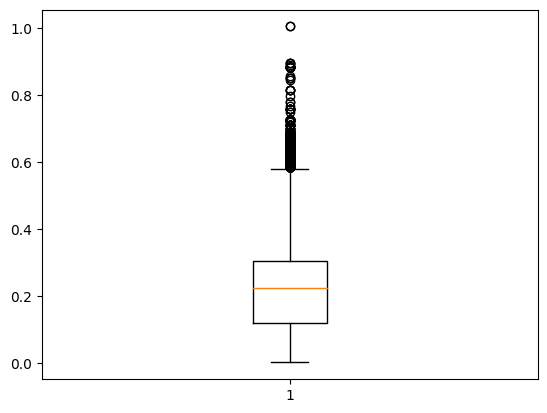

In [7]:
plt.boxplot(abalone_train["Shell_weight"])
plt.show()


In [8]:
abalone_train["Shell_weight"].describe()


count    94792.000000
mean         0.226468
std          0.130639
min          0.001500
25%          0.120000
50%          0.225000
75%          0.305000
max          1.005000
Name: Shell_weight, dtype: float64

In [9]:
abalone_train = abalone_train[abalone_train["Height"] != 0.0].copy()
abalone_train.reset_index(inplace=True, drop=True)
abalone_train.shape


(94784, 9)

In [10]:
abalone_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [11]:
abalone_train.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [12]:
abalone_train = pd.get_dummies(abalone_train)


In [13]:
abalone_train.columns


Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [14]:
abalone_train.replace(True, 1, inplace=True)
abalone_train.replace(False, 0, inplace=True)


In [15]:
abalone_train["Rings"] = abalone_train["Rings"] + 1.5


In [16]:
abalone_train


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,12.5,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,12.5,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,7.5,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,11.5,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,10.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
94780,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
94781,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
94782,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


In [17]:
abalone_train[:3] = np.square(abalone_train[:3])
abalone_train[3:7] = np.log(abalone_train[3:7] + 1)


In [18]:
abalone_train


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.302500,0.184900,0.022500,0.595212,0.107912,0.021462,0.057600,156.250000,1.0,0.000000,0.000000
1,0.396900,0.240100,0.021025,1.276900,0.209764,0.076452,0.102400,156.250000,1.0,0.000000,0.000000
2,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025,56.250000,0.0,1.000000,0.000000
3,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144,2.525729,0.0,0.000000,0.693147
4,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236,2.442347,0.0,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000,12.500000,1.0,0.000000,0.000000
94780,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500,11.500000,0.0,0.000000,1.000000
94781,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000,10.500000,0.0,0.000000,1.000000
94782,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000,11.500000,1.0,0.000000,0.000000


In [19]:
feature_df = abalone_train[
    [
        "Sex_F",
        "Sex_I",
        "Sex_M",
        "Length",
        "Diameter",
        "Height",
        "Whole_weight",
        "Shucked_weight",
        "Viscera_weight",
        "Shell_weight",
    ]
].copy()


target_sr = abalone_train["Rings"]


In [20]:
feature_df


,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.000000,0.000000,0.302500,0.184900,0.022500,0.595212,0.107912,0.021462,0.057600
1,1.0,0.000000,0.000000,0.396900,0.240100,0.021025,1.276900,0.209764,0.076452,0.102400
2,0.0,1.000000,0.000000,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025
3,0.0,0.000000,0.693147,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144
4,0.0,0.693147,0.000000,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236
...,...,...,...,...,...,...,...,...,...,...
94779,1.0,0.000000,0.000000,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000
94780,0.0,0.000000,1.000000,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500
94781,0.0,0.000000,1.000000,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000
94782,1.0,0.000000,0.000000,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000


In [21]:
feature_df.describe()


,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000
mean,0.293316,0.363233,0.343438,0.517402,0.401952,0.135651,0.790815,0.341606,0.169918,0.226464
std,0.455282,0.480931,0.474854,0.118314,0.098093,0.038178,0.459229,0.205267,0.101333,0.130642
min,0.000000,0.000000,0.000000,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025
25%,0.000000,0.000000,0.000000,0.445000,0.345000,0.110000,0.419500,0.177500,0.086875,0.120000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000
75%,1.000000,1.000000,1.000000,0.600000,0.470000,0.160000,1.072500,0.464500,0.233000,0.305000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [22]:
target_sr.describe()


count    94784.000000
mean        11.210597
std          3.251593
min          2.442347
25%          9.500000
50%         10.500000
75%         12.500000
max        156.250000
Name: Rings, dtype: float64

## [2] test, train 분리


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    feature_df, target_sr, test_size=0.2, random_state=12
)


In [24]:
print(f"x_train : {x_train.shape}, y_train : {y_train.shape}")
print(f"x_test : {x_test.shape} , y_test : {y_test.shape}")


x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)


MinMaxScaler()

In [26]:
scaler.min_, scaler.data_min_


(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.24296934e-02,
        -1.89684904e-02, -5.53403431e-04, -1.56102934e-04, -2.03297144e-05,
        -1.18422455e-05, -2.48762407e-05]),
 array([0.000e+00, 0.000e+00, 0.000e+00, 2.560e-02, 1.210e-02, 6.250e-04,
        4.410e-04, 3.025e-05, 9.000e-06, 2.500e-05]))

In [27]:
scaler.scale_, scaler.data_max_


(array([1.        , 1.        , 1.        , 1.2667849 , 1.56764383,
        0.88544549, 0.35397491, 0.67205667, 1.31580506, 0.99504963]),
 array([1.    , 1.    , 1.    , 0.815 , 0.65  , 1.13  , 2.8255, 1.488 ,
        0.76  , 1.005 ]))

In [28]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_train_scaled.shape


(75827, 10)

In [29]:
x_train_scaled.min(), x_train_scaled.max()


(Sex_F             0.0
 Sex_I             0.0
 Sex_M             0.0
 Length            0.0
 Diameter          0.0
 Height            0.0
 Whole_weight      0.0
 Shucked_weight    0.0
 Viscera_weight    0.0
 Shell_weight      0.0
 dtype: float64,
 Sex_F             1.0
 Sex_I             1.0
 Sex_M             1.0
 Length            1.0
 Diameter          1.0
 Height            1.0
 Whole_weight      1.0
 Shucked_weight    1.0
 Viscera_weight    1.0
 Shell_weight      1.0
 dtype: float64)

In [30]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
x_test_scaled.shape


(18957, 10)

In [31]:
x_test_scaled.min(), x_test_scaled.max()


(Sex_F             0.000000
 Sex_I             0.000000
 Sex_M             0.000000
 Length            0.132252
 Diameter          0.075090
 Height            0.002988
 Whole_weight      0.002145
 Shucked_weight    0.000652
 Viscera_weight    0.000646
 Shell_weight      0.001766
 dtype: float64,
 Sex_F             1.000000
 Sex_I             1.000000
 Sex_M             1.000000
 Length            0.980998
 Diameter          0.968647
 Height            0.455451
 Whole_weight      1.000000
 Shucked_weight    0.842067
 Viscera_weight    1.000000
 Shell_weight      0.892535
 dtype: float64)

## [3_2] 앙상블 - Bagging


In [32]:
from sklearn.ensemble import RandomForestRegressor


In [33]:
lf_model = RandomForestRegressor(random_state=12, oob_score=True)
lf_model.fit(x_train_scaled, y_train)


RandomForestRegressor(oob_score=True, random_state=12)

In [34]:
print(f"feature_names_in_ : {lf_model.feature_names_in_}")
print(f"n_features_in_ : {lf_model.n_features_in_}개")
print(f"feature_importances_ : {lf_model.feature_importances_}")
 

feature_names_in_ : ['Sex_F' 'Sex_I' 'Sex_M' 'Length' 'Diameter' 'Height' 'Whole_weight'
 'Shucked_weight' 'Viscera_weight' 'Shell_weight']
n_features_in_ : 10개
feature_importances_ : [0.00488853 0.00758281 0.00460038 0.04130023 0.03819143 0.06518317
 0.07479387 0.14589142 0.0642384  0.55332977]


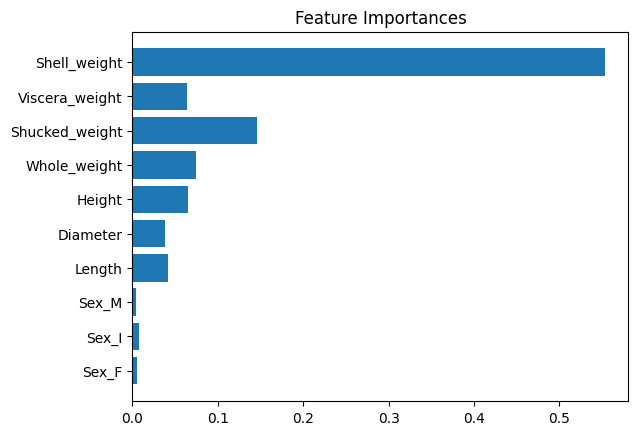

In [35]:
plt.barh(range(lf_model.n_features_in_), lf_model.feature_importances_)
plt.yticks(range(lf_model.n_features_in_), lf_model.feature_names_in_)
plt.title("Feature Importances")
plt.show()


In [36]:
print(f"oob_score_ : {lf_model.oob_score_}")


oob_score_ : 0.6229978310438558


In [37]:
train_score = lf_model.score(x_train_scaled, y_train)
test_score = lf_model.score(x_test_scaled, y_test)

print(f"train_score : {train_score}, test_score : {test_score}")


train_score : 0.9470876346412904, test_score : 0.5801329270811514


## [3-2_1] 튜닝


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor


In [39]:
params = {
    "max_depth": range(10, 30),
    "min_samples_leaf": range(2, 5),
    "criterion": ["squared_error", "poisson"],
}


In [40]:
rf_model = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)


In [41]:
search_cv = RandomizedSearchCV(
    rf_model, param_distributions=params, n_iter=50, verbose=4, cv=5, refit=True
)


In [42]:
search_cv.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=poisson, max_depth=10, min_samples_leaf=2;, score=0.622 total time=   2.3s
[CV 2/5] END criterion=poisson, max_depth=10, min_samples_leaf=2;, score=0.632 total time=   2.3s
[CV 3/5] END criterion=poisson, max_depth=10, min_samples_leaf=2;, score=0.619 total time=   2.3s
[CV 4/5] END criterion=poisson, max_depth=10, min_samples_leaf=2;, score=0.632 total time=   2.3s
[CV 5/5] END criterion=poisson, max_depth=10, min_samples_leaf=2;, score=0.552 total time=   2.2s
[CV 1/5] END criterion=squared_error, max_depth=9, min_samples_leaf=4;, score=0.614 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=9, min_samples_leaf=4;, score=0.623 total time=   1.7s
[CV 3/5] END criterion=squared_error, max_depth=9, min_samples_leaf=4;, score=0.609 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=9, min_samples_leaf=4;, score=0.623 total time=   1.7s
[CV 5/5] END criterion=squared_error

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(bootstrap=True, oob_score=True,
                                                 random_state=12),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(2, 5)},
                   verbose=4)

In [43]:
print(f"[search_cv.best_score_] {search_cv.best_score_}")
print(f"[search_cv.best_param] {search_cv.best_params_}")
print(f"[search_cv.best_estimator_] {search_cv.best_estimator_}")

cv_result_df = pd.DataFrame(search_cv.cv_results_)
cv_result_df


[search_cv.best_score_] 0.6346113544086824
[search_cv.best_param] {'min_samples_leaf': 3, 'max_depth': 19, 'criterion': 'squared_error'}
[search_cv.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=19, min_samples_leaf=3,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.264071,0.024757,0.107283,0.000889,2,10,poisson,"{'min_samples_leaf': 2, 'max_depth': 10, 'crit...",0.621989,0.632189,0.619046,0.631803,0.551633,0.611332,0.030302,33
1,1.713406,0.024197,0.094122,0.001262,4,9,squared_error,"{'min_samples_leaf': 4, 'max_depth': 9, 'crite...",0.613755,0.622810,0.609203,0.623063,0.544893,0.602745,0.029412,34
2,1.324077,0.011116,0.070201,0.000462,3,7,squared_error,"{'min_samples_leaf': 3, 'max_depth': 7, 'crite...",0.584015,0.589958,0.571853,0.592266,0.518450,0.571308,0.027360,43
3,2.919432,0.012989,0.132532,0.002143,3,12,poisson,"{'min_samples_leaf': 3, 'max_depth': 12, 'crit...",0.633458,0.645705,0.630225,0.644129,0.562350,0.623173,0.030990,26
4,5.086943,0.026825,0.202079,0.001535,4,18,poisson,"{'min_samples_leaf': 4, 'max_depth': 18, 'crit...",0.645507,0.657440,0.644829,0.655069,0.569961,0.634561,0.032688,2
5,3.950364,0.023408,0.182066,0.001366,4,16,squared_error,"{'min_samples_leaf': 4, 'max_depth': 16, 'crit...",0.643470,0.654136,0.641621,0.653762,0.569010,0.632399,0.032108,16
6,4.846986,0.018704,0.209729,0.002878,4,19,squared_error,"{'min_samples_leaf': 4, 'max_depth': 19, 'crit...",0.644302,0.656878,0.644121,0.654423,0.572025,0.634350,0.031589,6
7,1.091648,0.010052,0.050168,0.000415,4,5,poisson,"{'min_samples_leaf': 4, 'max_depth': 5, 'crite...",0.529359,0.537664,0.516594,0.531731,0.468419,0.516753,0.025126,50
8,4.812210,0.077272,0.197904,0.002928,2,16,squared_error,"{'min_samples_leaf': 2, 'max_depth': 16, 'crit...",0.643180,0.654345,0.642555,0.652767,0.570644,0.632698,0.031398,15
9,3.051290,0.008472,0.147000,0.001321,2,13,squared_error,"{'min_samples_leaf': 2, 'max_depth': 13, 'crit...",0.637037,0.647463,0.635631,0.648019,0.565546,0.626739,0.031023,22


In [44]:
search_cv.best_estimator_.score(x_test_scaled, y_test)


0.596521857199426

In [45]:
params = {
    "max_depth": range(5, 20),
    "min_samples_leaf": range(5, 15),
    "criterion": ["squared_error", "poisson"],
}


In [46]:
rf_model_u = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)


In [47]:
search_cv_u = RandomizedSearchCV(
    rf_model_u, param_distributions=params, n_iter=50, verbose=4, cv=5, refit=True
)


In [48]:
search_cv_u.fit(x_train_scaled, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10;, score=0.599 total time=   1.4s
[CV 2/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10;, score=0.609 total time=   1.4s
[CV 3/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10;, score=0.597 total time=   1.4s
[CV 4/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10;, score=0.610 total time=   1.4s
[CV 5/5] END criterion=squared_error, max_depth=8, min_samples_leaf=10;, score=0.533 total time=   1.4s
[CV 1/5] END criterion=poisson, max_depth=14, min_samples_leaf=12;, score=0.637 total time=   3.0s
[CV 2/5] END criterion=poisson, max_depth=14, min_samples_leaf=12;, score=0.649 total time=   3.0s
[CV 3/5] END criterion=poisson, max_depth=14, min_samples_leaf=12;, score=0.633 total time=   3.0s
[CV 4/5] END criterion=poisson, max_depth=14, min_samples_leaf=12;, score=0.647 total time=   3.0s
[CV 5/5] END criterion

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(bootstrap=True, oob_score=True,
                                                 random_state=12),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': range(5, 20),
                                        'min_samples_leaf': range(5, 15)},
                   verbose=4)

In [49]:
print(f"[search_cv_u.best_score_] {search_cv_u.best_score_}")
print(f"[search_cv_u.best_param] {search_cv_u.best_params_}")
print(f"[search_cv_u.best_estimator_] {search_cv_u.best_estimator_}")

cv_result_df_u = pd.DataFrame(search_cv_u.cv_results_)
cv_result_df_u


[search_cv_u.best_score_] 0.6329734595785859
[search_cv_u.best_param] {'min_samples_leaf': 5, 'max_depth': 17, 'criterion': 'squared_error'}
[search_cv_u.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=17, min_samples_leaf=5,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.447087,0.007458,0.081392,0.000541,10,8,squared_error,"{'min_samples_leaf': 10, 'max_depth': 8, 'crit...",0.598721,0.608608,0.596796,0.609855,0.533209,0.589438,0.028588,39
1,2.987532,0.011595,0.144068,0.000525,12,14,poisson,"{'min_samples_leaf': 12, 'max_depth': 14, 'cri...",0.637034,0.648579,0.633175,0.646695,0.563990,0.625895,0.031485,20
2,2.827126,0.008287,0.137174,0.001118,11,13,poisson,"{'min_samples_leaf': 11, 'max_depth': 13, 'cri...",0.634861,0.646182,0.632021,0.646765,0.562090,0.624384,0.031701,23
3,1.876250,0.009183,0.092160,0.000686,8,9,poisson,"{'min_samples_leaf': 8, 'max_depth': 9, 'crite...",0.612519,0.623573,0.607105,0.623651,0.543400,0.602050,0.030016,35
4,2.964762,0.006814,0.141085,0.001776,7,13,poisson,"{'min_samples_leaf': 7, 'max_depth': 13, 'crit...",0.636969,0.647698,0.633955,0.647793,0.562568,0.625797,0.032102,21
5,1.633288,0.012145,0.093516,0.001884,14,9,squared_error,"{'min_samples_leaf': 14, 'max_depth': 9, 'crit...",0.611393,0.624927,0.607640,0.622640,0.543164,0.601953,0.030111,36
6,2.891740,0.054189,0.156340,0.003582,14,16,squared_error,"{'min_samples_leaf': 14, 'max_depth': 16, 'cri...",0.638200,0.649625,0.634881,0.649064,0.564206,0.627195,0.032028,16
7,2.876661,0.012693,0.138123,0.001989,9,13,poisson,"{'min_samples_leaf': 9, 'max_depth': 13, 'crit...",0.635902,0.647307,0.633458,0.646058,0.562026,0.624950,0.031929,22
8,0.967346,0.005954,0.051202,0.000663,13,5,squared_error,"{'min_samples_leaf': 13, 'max_depth': 5, 'crit...",0.529902,0.540216,0.516500,0.534294,0.470655,0.518313,0.025076,48
9,2.343401,0.007655,0.115899,0.000972,10,11,poisson,"{'min_samples_leaf': 10, 'max_depth': 11, 'cri...",0.627746,0.639388,0.625239,0.639376,0.556955,0.617741,0.030945,27


In [50]:
search_cv_u.best_estimator_.score(x_test_scaled, y_test)


0.5888789902603078

In [51]:
# # 모델 저장

# from joblib import dump


# dump(search_cv_u.best_estimator_, "model_ml_embedding.joblib")


In [68]:
x_test.columns


Index(['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height',
       'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [69]:
test = [[1, 0, 0, 0.55, 0.43, 0.15, 0.7715, 0.3285, 0.1465, 0.24]]

test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=x_test.columns)

best = search_cv_u.best_estimator_

best.predict(test_scaled)


c:\ProgramData\miniconda3\envs\MNV\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([11.74985512])

In [70]:
test = [[1, 0, 0, 0.63, 0.49, 0.145, 1.13, 0.458, 0.2765, 0.32]]

test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=x_test.columns)

best = search_cv_u.best_estimator_

best.predict(test_scaled)


c:\ProgramData\miniconda3\envs\MNV\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([12.39583126])

---

params = {
    "max_depth": range(5, 20),
    "min_samples_leaf": range(5, 15),
    "criterion": ["squared_error", "poisson"],
}


In [ ]:
rf_model_u1 = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)


In [ ]:
search_cv_u1 = RandomizedSearchCV(
    rf_model_u1, param_distributions=params, n_iter=50, verbose=4, cv=5, refit=True
)


In [ ]:
search_cv_u1.fit(x_train_scaled, y_train)


In [ ]:
print(f"[search_cv_u.best_score_] {search_cv_u1.best_score_}")
print(f"[search_cv_u.best_param] {search_cv_u1.best_params_}")
print(f"[search_cv_u.best_estimator_] {search_cv_u1.best_estimator_}")

In [ ]:
search_cv_u1.best_estimator_.score(x_test_scaled, y_test)
